<a href="https://colab.research.google.com/github/RezaulKarim-506/research/blob/master/new_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from numpy import array

from keras.preprocessing.text import one_hot, Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, GlobalMaxPooling1D, Embedding, Conv1D, LSTM
from sklearn.model_selection import train_test_split

In [ ]:
movie_reviews = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset_for_Bangla_as_text.csv',encoding = "utf-16", sep = "\t")

In [ ]:
movie_reviews.shape

(5001, 3)

In [ ]:
movie_reviews.head(5)

,Reviews,Feelings,Polarity
0,জমে উঠেছে গ্রুপ বি এর খেলা।,excitement,positive
1,"এখন খেলা হপ্পে, যে দল হারবে সেই দল বাদ পড়ে যাবে",excitement,neutral
2,সব কয়টা সমান,other,neutral
3,সোজা হিসাব যে হারবে সেই বাদ পরবে,sad,positive
4,হিসাব বরবর,other,neutral


In [ ]:
movie_reviews.isnull().values.any()

True

In [ ]:
movie_reviews

,Reviews,Feelings,Polarity
0,জমে উঠেছে গ্রুপ বি এর খেলা।,excitement,positive
1,"এখন খেলা হপ্পে, যে দল হারবে সেই দল বাদ পড়ে যাবে",excitement,neutral
2,সব কয়টা সমান,other,neutral
3,সোজা হিসাব যে হারবে সেই বাদ পরবে,sad,positive
4,হিসাব বরবর,other,neutral
...,...,...,...
4996,জাতীয় দলে এনে রানের ফোয়াড়া বন্ধ করার জন্য কতৃপ...,sad,positive
4997,যেমন বোলার তেমন ব্যাটসম্যান.....,happy,positive
4998,টেস্ট ও ওডিআই এর জন্য ঠিক আছে।,other,neutral
4999,রানের ফোয়ারা শুধু ঘরোয় পরিবেশেই সম্ভব,happy,negative


In [ ]:
movie_reviews=movie_reviews.dropna()

In [ ]:
movie_reviews

,Reviews,Feelings,Polarity
0,জমে উঠেছে গ্রুপ বি এর খেলা।,excitement,positive
1,"এখন খেলা হপ্পে, যে দল হারবে সেই দল বাদ পড়ে যাবে",excitement,neutral
2,সব কয়টা সমান,other,neutral
3,সোজা হিসাব যে হারবে সেই বাদ পরবে,sad,positive
4,হিসাব বরবর,other,neutral
...,...,...,...
4995,এত এত হেডলাইন করে লাভ অাছে স্কোয়াডে না নিয়ে,sad,negative
4996,জাতীয় দলে এনে রানের ফোয়াড়া বন্ধ করার জন্য কতৃপ...,sad,positive
4997,যেমন বোলার তেমন ব্যাটসম্যান.....,happy,positive
4998,টেস্ট ও ওডিআই এর জন্য ঠিক আছে।,other,neutral


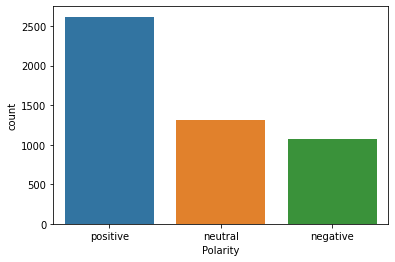

In [ ]:
import seaborn as sns
sns.countplot(x='Polarity', data=movie_reviews)

In [ ]:
movie_reviews["Reviews"][0]

'জমে উঠেছে গ্রুপ বি এর খেলা।'

In [ ]:
import re,json,nltk
import string
def process_comments(Reviews): 
    Reviews = re.sub('[^\u0980-\u09FF]',' ',str(Reviews)) #removing unnecessary punctuation
    stop_words = open("/content/drive/MyDrive/Colab Notebooks (1)/new/bangla_stopwords.txt",encoding='utf=8').read().split('\n')
    tokens = re.split('\s+',Reviews)
    Reviews = " ".join(word for word in tokens if word not in stop_words)
    return Reviews

In [ ]:
# Apply the function into the dataframe
movie_reviews['cleaned'] = movie_reviews['Reviews'].apply(process_comments)  
print('Original:\n',movie_reviews.Reviews,'\nCleaned:\n',movie_reviews.cleaned,'\n')


Original:
 0                             জমে উঠেছে গ্রুপ বি এর খেলা।
1         এখন খেলা হপ্পে, যে দল হারবে সেই দল বাদ পড়ে যাবে
2                                            সব কয়টা সমান
3                        সোজা হিসাব যে হারবে সেই বাদ পরবে
4                                              হিসাব বরবর
                              ...                        
4995          এত এত হেডলাইন করে লাভ অাছে স্কোয়াডে না নিয়ে
4996    জাতীয় দলে এনে রানের ফোয়াড়া বন্ধ করার জন্য কতৃপ...
4997                     যেমন বোলার তেমন ব্যাটসম্যান.....
4998                       টেস্ট ও ওডিআই এর জন্য ঠিক আছে।
4999              রানের ফোয়ারা শুধু ঘরোয় পরিবেশেই সম্ভব
Name: Reviews, Length: 4997, dtype: object 
Cleaned:
 0                                   জমে উঠেছে গ্রুপ খেলা 
1                          খেলা হপ্পে দল হারবে দল বাদ পড়ে
2                                               কয়টা সমান
3                               সোজা হিসাব হারবে বাদ পরবে
4                                              হিসাব বরবর
       

<ipython-input-39-dbc0472879b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_reviews['cleaned'] = movie_reviews['Reviews'].apply(process_comments)


In [ ]:
movie_reviews

,Reviews,Feelings,Polarity,cleaned
0,জমে উঠেছে গ্রুপ বি এর খেলা।,excitement,positive,জমে উঠেছে গ্রুপ খেলা
1,"এখন খেলা হপ্পে, যে দল হারবে সেই দল বাদ পড়ে যাবে",excitement,neutral,খেলা হপ্পে দল হারবে দল বাদ পড়ে
2,সব কয়টা সমান,other,neutral,কয়টা সমান
3,সোজা হিসাব যে হারবে সেই বাদ পরবে,sad,positive,সোজা হিসাব হারবে বাদ পরবে
4,হিসাব বরবর,other,neutral,হিসাব বরবর
...,...,...,...,...
4995,এত এত হেডলাইন করে লাভ অাছে স্কোয়াডে না নিয়ে,sad,negative,হেডলাইন লাভ অাছে স্কোয়াডে
4996,জাতীয় দলে এনে রানের ফোয়াড়া বন্ধ করার জন্য কতৃপ...,sad,positive,জাতীয় দলে এনে রানের ফোয়াড়া বন্ধ কতৃপক্ষের অনুর...
4997,যেমন বোলার তেমন ব্যাটসম্যান.....,happy,positive,বোলার ব্যাটসম্যান
4998,টেস্ট ও ওডিআই এর জন্য ঠিক আছে।,other,neutral,টেস্ট ওডিআই


In [ ]:
#y = movie_reviews['cleaned']

#y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

    
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(movie_reviews['cleaned'].values)
X = tokenizer.texts_to_sequences(movie_reviews['cleaned'].values)
X = pad_sequences(X)
X[:3]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  971,
        1401,    7],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    7,    5,  200,    5,
          31,  201],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
        1777, 1402]], dtype=int32)

In [ ]:
#X = []
#sentences = list(movie_reviews['cleaned'])
#for Reviews in sentences:
 #   X.append(process_comments(Reviews))

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix,classification_report
import re

embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 24, 128)           256000    
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 24, 128)          0         
 lDropout1D)                                                     
                                                                 
 lstm_3 (LSTM)               (None, 196)               254800    
                                                                 
 dense_3 (Dense)             (None, 3)                 591       
                                                                 
Total params: 511,391
Trainable params: 511,391
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
Y = pd.get_dummies(movie_reviews['Polarity']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(3997, 24) (3997, 3)
(1000, 24) (1000, 3)


In [ ]:
batch_size = 128
model.fit(X_train, Y_train, epochs = 15, batch_size=batch_size, verbose = 1)

Epoch 1/15
32/32 [==============================] - 13s 282ms/step - loss: 1.0381 - accuracy: 0.5141
Epoch 2/15
32/32 [==============================] - 9s 280ms/step - loss: 0.9472 - accuracy: 0.5384
Epoch 3/15
32/32 [==============================] - 9s 281ms/step - loss: 0.7800 - accuracy: 0.6575
Epoch 4/15
32/32 [==============================] - 9s 279ms/step - loss: 0.6534 - accuracy: 0.7278
Epoch 5/15
32/32 [==============================] - 11s 346ms/step - loss: 0.5616 - accuracy: 0.7671
Epoch 6/15
32/32 [==============================] - 9s 284ms/step - loss: 0.4905 - accuracy: 0.7988
Epoch 7/15
32/32 [==============================] - 9s 284ms/step - loss: 0.4422 - accuracy: 0.8326
Epoch 8/15
32/32 [==============================] - 9s 280ms/step - loss: 0.4023 - accuracy: 0.8374
Epoch 9/15
32/32 [==============================] - 9s 282ms/step - loss: 0.3657 - accuracy: 0.8554
Epoch 10/15
32/32 [==============================] - 9s 282ms/step - loss: 0.3442 - accuracy: 0.86

In [ ]:
Y_pred = model.predict(X_test,batch_size = batch_size)

In [ ]:
from pandas import Series
from numpy.random import randn

df_test = pd.DataFrame({'true': Y_test.tolist(), 'pred':Y_pred})
df_test['true'] = df_test['true'].apply(lambda x: np.argmax(x))
print("confusion matrix",confusion_matrix(df_test.true, df_test.pred))
print(classification_report(df_test.true, df_test.pred))

ValueError: ignored

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)

X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)

In [ ]:
# Adding 1 to store dimensions for words for which no pretrained word embeddings exist

vocab_length = len(word_tokenizer.word_index) + 1

vocab_length

7542

In [ ]:
# Padding all reviews to fixed length 100

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
# Load GloVe word embeddings and create an Embeddings Dictionary

from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('/content/drive/MyDrive/Colab Notebooks (1)/new/a2_glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [ ]:
# Create Embedding Matrix having 100 columns 
# Containing 100-dimensional GloVe word embeddings for all words in our corpus.

embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
embedding_matrix.shape

(7542, 100)

In [ ]:
from keras.layers import LSTM

In [ ]:
# Neural Network architecture

lstm_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)

lstm_model.add(embedding_layer)
lstm_model.add(LSTM(128))

lstm_model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Model compiling

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(lstm_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          754200    
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 871,577
Trainable params: 117,377
Non-trainable params: 754,200
_________________________________________________________________
None


In [ ]:
# Model Training

lstm_model_history = lstm_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
25/25 [==============================] - 12s 362ms/step - loss: 0.2224 - acc: 1.0000 - val_loss: 8.8085e-05 - val_acc: 1.0000
Epoch 2/6
25/25 [==============================] - 7s 295ms/step - loss: 4.7444e-05 - acc: 1.0000 - val_loss: 3.0856e-05 - val_acc: 1.0000
Epoch 3/6
25/25 [==============================] - 7s 301ms/step - loss: 2.7570e-05 - acc: 1.0000 - val_loss: 2.5167e-05 - val_acc: 1.0000
Epoch 4/6
25/25 [==============================] - 7s 300ms/step - loss: 2.3717e-05 - acc: 1.0000 - val_loss: 2.2270e-05 - val_acc: 1.0000
Epoch 5/6
25/25 [==============================] - 7s 299ms/step - loss: 2.1075e-05 - acc: 1.0000 - val_loss: 1.9832e-05 - val_acc: 1.0000
Epoch 6/6
25/25 [==============================] - 8s 300ms/step - loss: 1.8783e-05 - acc: 1.0000 - val_loss: 1.7694e-05 - val_acc: 1.0000


In [ ]:
# Predictions on the Test Set

score = lstm_model.evaluate(X_test, y_test, verbose=1)

32/32 [==============================] - 1s 41ms/step - loss: 1.0199e-05 - acc: 1.0000


In [ ]:
# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 1.0199099051533267e-05
Test Accuracy: 1.0


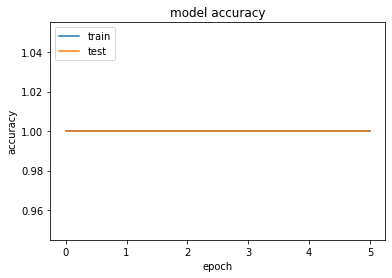

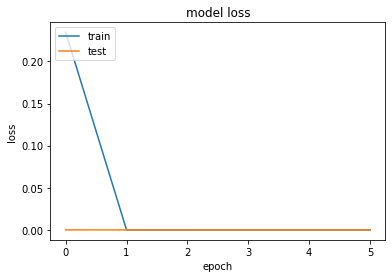

In [ ]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(lstm_model_history.history['acc'])
plt.plot(lstm_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(lstm_model_history.history['loss'])
plt.plot(lstm_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

CNN Model Training

In [ ]:
from keras.layers import Conv1D

In [ ]:
# Neural Network architecture

cnn_model = Sequential()

embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
cnn_model.add(embedding_layer)

cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Model compiling

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(cnn_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          754200    
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 818,457
Trainable params: 64,257
Non-trainable params: 754,200
_________________________________________________________________
None


In [ ]:
# Model training

cnn_model_history = cnn_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
25/25 [==============================] - 3s 83ms/step - loss: 0.6872 - acc: 1.0000 - val_loss: 0.6807 - val_acc: 1.0000
Epoch 2/6
25/25 [==============================] - 2s 75ms/step - loss: 0.6749 - acc: 1.0000 - val_loss: 0.6685 - val_acc: 1.0000
Epoch 3/6
25/25 [==============================] - 2s 74ms/step - loss: 0.6628 - acc: 1.0000 - val_loss: 0.6566 - val_acc: 1.0000
Epoch 4/6
25/25 [==============================] - 2s 74ms/step - loss: 0.6509 - acc: 1.0000 - val_loss: 0.6448 - val_acc: 1.0000
Epoch 5/6
25/25 [==============================] - 2s 74ms/step - loss: 0.6393 - acc: 1.0000 - val_loss: 0.6333 - val_acc: 1.0000
Epoch 6/6
25/25 [==============================] - 2s 74ms/step - loss: 0.6278 - acc: 1.0000 - val_loss: 0.6220 - val_acc: 1.0000


In [ ]:
# Predictions on the Test Set

score = cnn_model.evaluate(X_test, y_test, verbose=1)

32/32 [==============================] - 0s 8ms/step - loss: 0.6220 - acc: 1.0000


In [ ]:
# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.6219680905342102
Test Accuracy: 1.0


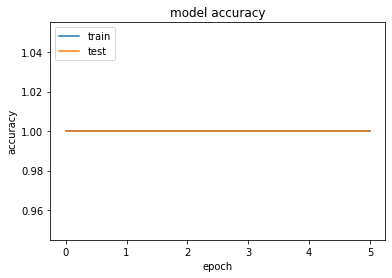

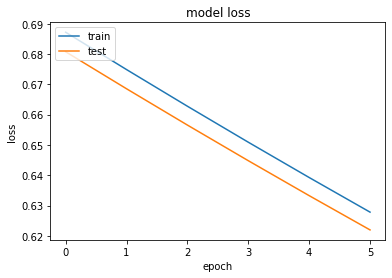

In [ ]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(cnn_model_history.history['acc'])
plt.plot(cnn_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(cnn_model_history.history['loss'])
plt.plot(cnn_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()